# Data Analyst Nanodegree P2: investigate a dataset


#### The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

#### One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

#### In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive.

##### https://www.kaggle.com/c/titanic

### Project description:

#### In this project, we are going to explore the dataset in *.csv of 891 passengers of the Titanic which includes key information such as the variables below:

- Survival (0 = No; 1 = Yes)
- Pclass (Passenger Class: 1 = 1st; 2 = 2nd; 3 = 3rd); serves as a proxy for socio-economic status
- Name
- Sex
- Age
- Sib/Sp (number of Siblings/Spouses Aboard)
- Parch (number of Parents/Children Aboard)
- Ticket Number
- Passenger Fare
- Cabin Number
- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Questions:

#### The main question we will try to answer: which single variable had the strongest impact on the survival rate of each passenger, if possible in a percentage/probability term ?

#### Then we will try to identify combinations of variables that may have an even stronger impact on the survival rate, beside the single variable above.

In [1]:
# Imports
import csv as csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
sns.set_style('whitegrid')
%matplotlib inline

# We upload the *.csv file
titanic_df = pd.read_csv('titanic_data.csv', header=0)

#### We start with a first look at the data with a serie of Pandas functions.

In [2]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


#### The titanic_df.info() indicates that three colums lack some data and may require some data wrangling, if possible.
- Age : 177 values missing (likely)
- Cabin : 687 values missing (unlikely)
- Embarked : 2 values missing (easy)

In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### The titanic_df.describe() provides two immediate observations:
- Survival rate: only 38% of the 891 passengers survived
- Age: the average age of all passengers was 29.7 years with a strong StDev of 14.5 years

## Univariate Analysis: a first serie of visualizations of the passengers' profiles.

In [6]:
# Writing a serie of sns.xxxplot() function to avoid repetitive code
def countplot(column):
    return sns.countplot(x= column, data= titanic_df)

def boxplot(column1, column2):
    return sns.boxplot(x= column1, y= column2, data= titanic_df)

def swarmplot(column1, column2):
    return sns.swarmplot(x= column1, y= column2, data= titanic_df)

def barplot(column1, column2):
    return sns.barplot(x= column1, y= column2, data= titanic_df, ci= None)

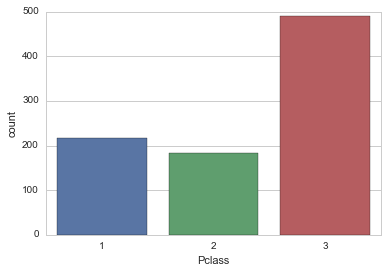

In [7]:
countplot("Pclass")

#### There were more passengers travelling in 3rd Class than in 2nd and 1st Class -combined-. 

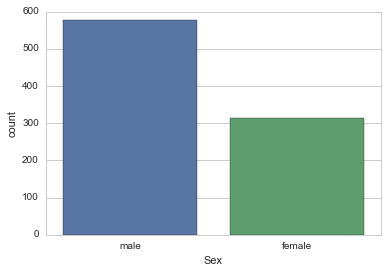

In [8]:
countplot("Sex")

#### Male passengers outnumbered female passengers almost 2 to 1.

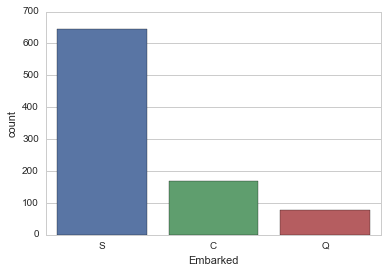

In [9]:
countplot("Embarked")

 S = Southampton; C = Cherbourg; Q = Queenstown
#### An overwhelming majority of the passengers embarked in Southampton, its first port for collecting passengers.
https://en.wikipedia.org/wiki/RMS_Titanic#Collecting_passengers

[]

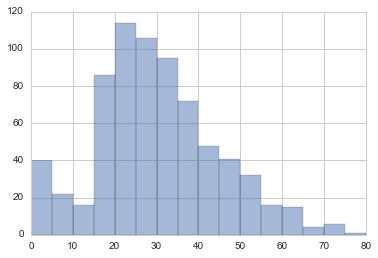

In [10]:
# An histogram of ages, in 16 bins, NA values dropped
titanic_df['Age'].dropna().hist(bins=16, range=(0,80), alpha = .5).plot()

#### This basic histogram shows the age repartition of 714 passengers (177 missing ) with a small long-tail in 55+

## Further Exploration with multiple-variable functions

#### Before wrangling the data, let's run a second set of exploratory functions.

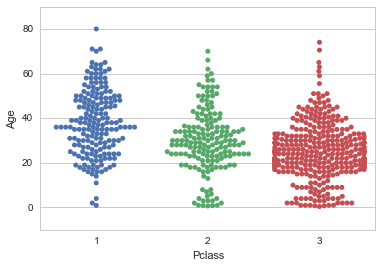

In [11]:
swarmplot('Pclass', 'Age')

#### The age of passengers in each class, with a swarmplot (aka. "beeswarm")
http://stanford.edu/~mwaskom/software/seaborn-dev/generated/seaborn.swarmplot.html
#### While the 1st Class has a rather homogeneous spread between 18 to 60, we can observe a clear overweight of the 18 to 35 range in 3rd Class

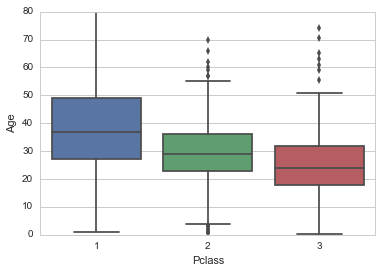

In [12]:
boxplot('Pclass', 'Age')

#### The age of passengers in each class, with a boxplot showing the quartiles (box) and the outliers (dots)
https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html

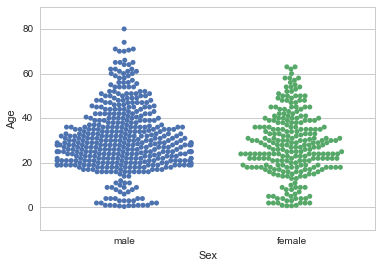

In [13]:
swarmplot('Sex', 'Age')

#### The age of male and female passengers in swarmplot, with an overweight of 18 to 35 among male passengers.

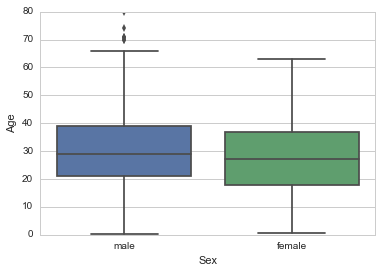

In [14]:
boxplot("Sex", "Age")

#### The age of male and female passengers in boxplot

## Focused Exploration around the "Survived" variable.
#### We now start to explore the data to answer our main question:
- Which single variable had the strongest impact on the survival rate of each passenger, if possible in a percentage/probability term ?

In [15]:
# Writing a *.groupby().mean() function to avoid repetitive code
def gb_mean(column):
    return titanic_df.groupby(column).mean()

In [16]:
gb_mean('Survived')

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


#### The titanic_df.groupby('Survived').mean() provides a first discrepancy between suvivors and non-survivors in the Pclass column, let's explore it further.

In [17]:
gb_mean('Pclass')

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


#### Here we get the first hint: the lower the cabin class of the passenger (1st to 3rd), the lower its survival rate (63% to  24%).

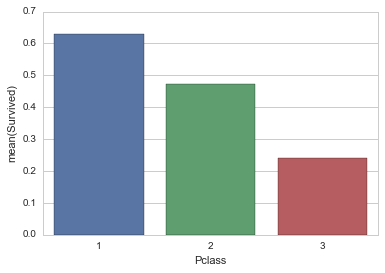

In [18]:
barplot('Pclass', 'Survived')

#### The same comparison of survival by class visualized in a barplot.

#### We continue the exploration with "Sex" column, female vs. male.

In [19]:
gb_mean('Sex')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


#### Here we get the second hint: female passengers had a very signficantly higher rate of survival than male passengers (74% vs 19%)

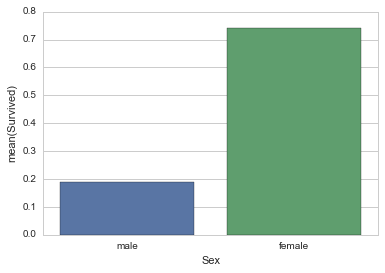

In [20]:
barplot('Sex', 'Survived')

#### The same comparison of survival by "Sex" visualized in a barplot.

#### We continue the exploration with "Embarked" column, indicating in which port the passenger embarked.
- C: Cherbourg (France)
- Q: Queenstown (UK)
- S: Southampton (UK)

In [21]:
gb_mean('Embarked')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


#### We observe a significantly better survival rate among passengers embarked in France (55%) than in UK (34% to 39%).
#### Although one may suggest that citizenship or language was a critical factor ( French are better swimmers ?), there are no  available data such as country-of-origin to investigate further.
#### A more careful look at the stats shows a discrepancy in the "Class" and the "Fare" between FR and UK embarkments:
- The Cherbourg-embarked were in higher class (mean 1.88) than Queenstown/Southampton (2.35 to 2.90)
- The Cherbourg-embarked paid a largely higher fare (59.95) than the UK-embarked (13.27 to 27.07)

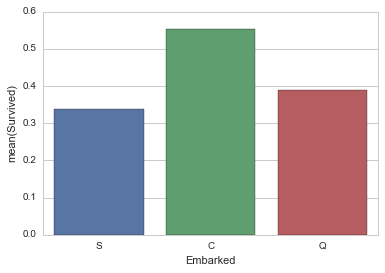

In [22]:
barplot('Embarked', 'Survived')

#### The same comparison of survival by "Embarked" visualized in a barplot.

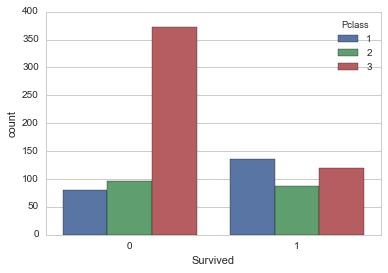

In [23]:
sns.countplot(x='Survived', hue="Pclass", data=titanic_df, order=[0,1])

#### Survivors (1) vs Non-Survivors (0) according to "Pclass", in absolute values. The 3rd Class suffered the largest hit, almost 4 times the other classes.

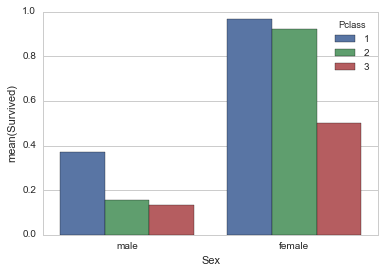

In [24]:
sns.barplot(x= 'Sex', y= 'Survived', hue="Pclass", data= titanic_df, ci= None)

#### A more detailled analysis of survival by Class and Sex, in percentage. Over 90% of female passengers in 1st and 2nd Class survived.

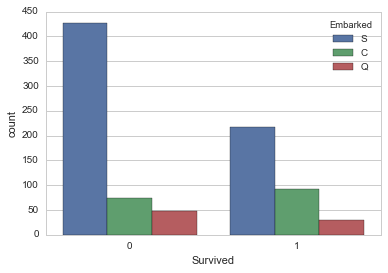

In [25]:
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[0,1])

#### Survivors (1) vs Non-Survivors (0) according to "Embarked", in absolute values. Passengers embarked in Southampton suffered the largest hit, almost 9 times the other ports.

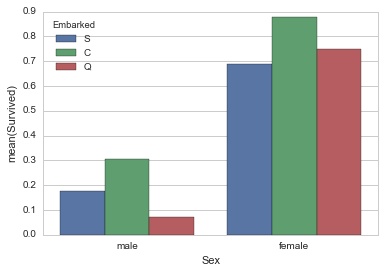

In [26]:
sns.barplot(x= 'Sex', y= 'Survived', hue="Embarked", data= titanic_df, ci= None)

#### A more detailled analysis of survival by Port and Sex, in percentage, gives a different outlook than the previous graph in absolute values.
#### While all ports for females had a similar impact on survival (70 to 85%), if you were a male to embark in Queenstown, you were doomed ! (less than 10% chance of survival).



## Data Wrangling Phase

#### As shown earlier, there are several columns missing data as NA (not available), the key one being "Age".
#### Also, some columns use a string format ("Sex" and "Embarked") which may complicate further calculations.
#### Let's see if we can fix these, starting with the easiest steps.

#### We now convert the "Sex" column from ('Female' or 'Male') into a new "Gender" column with numerical values ('0' or '1').

In [27]:
titanic_df['Gender'] = 4

In [28]:
titanic_df['Gender'] = titanic_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1


#### Now we convert the "Embarked" column ('C' or 'Q' or 'S') into a new "Port' column with numerical values ('1' or '2' or '3').

In [30]:
titanic_df['Port'] = 4

In [31]:
titanic_df['Port'] = titanic_df['Embarked'].dropna().map( {'C': 1, 'Q': 2, 'S': 3} ).astype(int)

In [32]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Port
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,3


#### Final step in data wrangling, we fix the missing "Age" values.
#### I suggest that we build an array to calculate the median age by "Sex" and "Pclass", then use those values to replace the missing ones in a new column named "Gender".
#### So we keep the original one "Age" intact, as opposed to forcing our way in with some *.pandas.df.fillna().

In [33]:
median_ages = np.zeros((2,3))
median_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [34]:
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = titanic_df[(titanic_df['Gender'] == i) & \
                              (titanic_df['Pclass'] == j+1)]['Age'].dropna().median()
 
median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

#### We created an array to calculate the median "Age" value by "Sex" and "Pclass".
#### Now we will use those to replace the missing ones in a new column "AgeFill", proceding step by step with due tests for checks.

In [35]:
titanic_df['AgeFill'] = titanic_df['Age']

In [36]:
# we check a sample before.
titanic_df[ titanic_df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN
28,0,3,NaN,NaN
29,1,3,NaN,NaN
31,0,1,NaN,NaN
32,0,3,NaN,NaN
36,1,3,NaN,NaN
42,1,3,NaN,NaN


In [37]:
# We apply the replacing code.
for i in range(0, 2):
    for j in range(0, 3):
        titanic_df.loc[ (titanic_df.Age.isnull()) & (titanic_df.Gender == i) & (titanic_df.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]

In [38]:
# We check the same sample after implementing the replacing code.
titanic_df[ titanic_df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


#### This above is the survival rate by "Age", rounded to the interger value.

[]

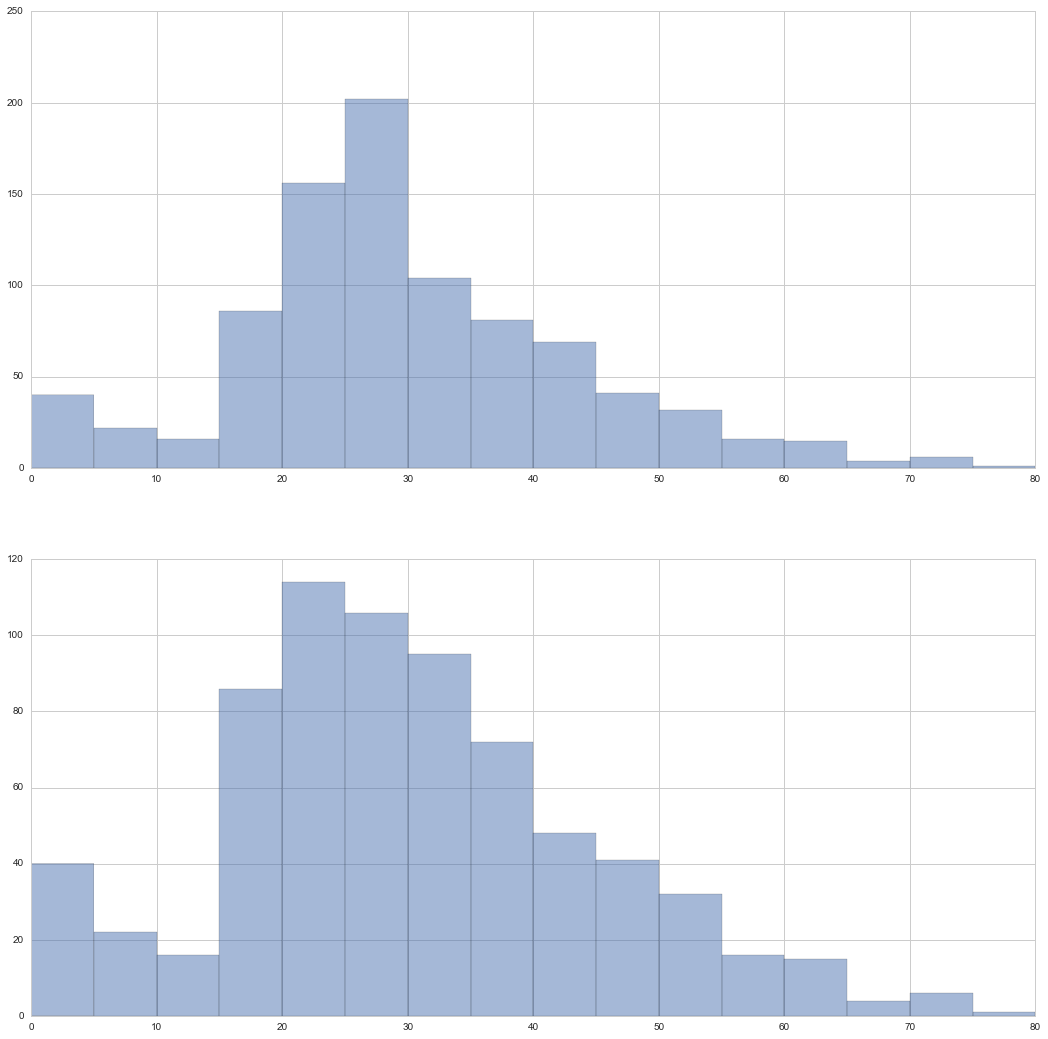

In [39]:
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(211)
titanic_df['AgeFill'].hist(bins=16, range=(0,80), alpha = .5).plot()
ax2 = fig.add_subplot(212)
titanic_df['Age'].dropna().hist(bins=16, range=(0,80), alpha = .5).plot()

#### The revised histogram of ages (Up) from the column "AgeFill", with the original one (Low).
#### The new peak in 20:30 is artificially caused by the injection of 177 median values.

#### Now that we have an updated "Age" column with the "AgeFill" column, we can investigate the survival rate per age.
#### For better reading, we fix the comma/floating values by forcing an 'int' type.

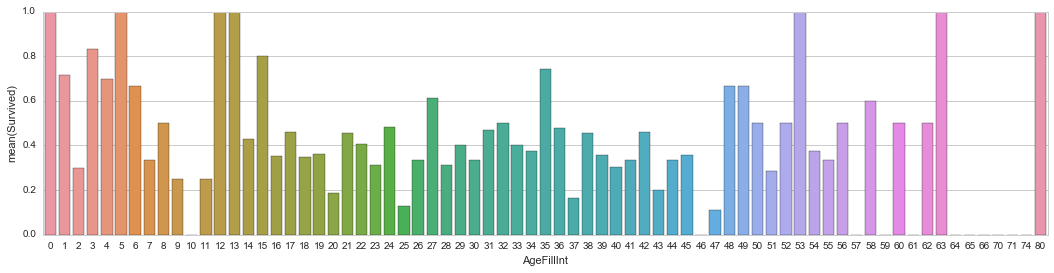

In [40]:
# convert from float to int
titanic_df['AgeFillInt'] = titanic_df['AgeFill'].astype(int)
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
barplot('AgeFillInt', 'Survived')

#### This above is the survival rate by "Age", rounded to the interger value.

### From now on, I calculate more granular analysis based on three variables, such as "Embarked" + "Sex" + "Pclass" to find the most potent combination for death or survival.
#### First we count the passengers for each combination then the relevant survival rate

In [41]:
# Computing survival probability based on "Port", "Sex" and "Class".
max_chance= gb_mean(['Embarked', 'Sex', 'Pclass'])['Survived']
max_chance

Embarked  Sex     Pclass
C         female  1         0.976744
                  2         1.000000
                  3         0.652174
          male    1         0.404762
                  2         0.200000
                  3         0.232558
Q         female  1         1.000000
                  2         1.000000
                  3         0.727273
          male    1         0.000000
                  2         0.000000
                  3         0.076923
S         female  1         0.958333
                  2         0.910448
                  3         0.375000
          male    1         0.354430
                  2         0.154639
                  3         0.128302
Name: Survived, dtype: float64

In [42]:
titanic_df.groupby(['Embarked', 'Sex', 'Pclass'])['Survived'].count()

Embarked  Sex     Pclass
C         female  1          43
                  2           7
                  3          23
          male    1          42
                  2          10
                  3          43
Q         female  1           1
                  2           2
                  3          33
          male    1           1
                  2           1
                  3          39
S         female  1          48
                  2          67
                  3          88
          male    1          79
                  2          97
                  3         265
Name: Survived, dtype: int64

#### Several observations:
- Some combinations had too few passengers (down to 1 only) to validate the survival rate
- Others seemed more realistic like "The 43 Females in 1st Class embarked in Cherbourg" with 97.7% survival or "The 265 Males in 3rd Class embarked in Southampton" with 12.8% survival

## Chi-Squared Test
#### We've seen in "Mutiple-variable exploration of -Survived-" that Sex seemed to have the highest impact in the survival rate of the passengers.
#### Let's run a Chi-Squared Test on the statistical significance of relationship between "Sex" and "Survived" variables.
- Probability of 0: both variable are dependant
- Probability of 1: both variables are independant
- Probability of less than 0.05: the relationship between the two variables is significant at 95% confidence

In [43]:
def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))


chisq_of_df_cols(titanic_df, 'Sex', 'Survived')

(260.71702016732104,
 1.1973570627755645e-58,
 1L,
 array([[ 193.47474747,  355.52525253],
        [ 120.52525253,  221.47474747]]))

#### Since the p-value < 0.05 (1.97 e-58), we can infer that Sex is a significant variable of Survived.

## CONCLUSION
### Limitations
- The dataset is incomplete as it includes only 891 passengers out of 2,224 in total, including 885 crews.
https://en.wikipedia.org/wiki/RMS_Titanic#Survivors_and_victims
- There were many missing values, including 177 "Ages" and over 680 "Cabin". We had to used median Age values par Sex and Pclass to fill in, thus skewing the data towards the medians.
- The Fares values included Grouped-Purchase without indication of individual prices, thus preventing a true analysis per fare.

### Summary
#### We found out that three variables had a strong impact on the survival rate of passengers:
- Sex: 74.2% of the Females survived while only 18.9% of the Males did.
- Pclass: 62.9% of the passengers in 1st Class survived vs. 47.3% in 2nd Class and 24.2% in 3rd Class.
- Embarked: 53.5% of the passengers embarked in Cherbourg survived vs. 38.9% in Queenstown and 33.7% in Southampton.

#### We also found two extreme cases of survival rate when combining the three variables:
- If you were a Female embarked in 1st Class in Cherbourg, your survival rate was highest with 97.67%
- If you were a Male embarked in 3rd Class in Queenstown, your survival rate was lowest with 7.69%